In [1]:
from utils import*

Using TensorFlow backend.


## Parallel Setting

#### Measurements

In [10]:
dataset_name = 'arduino_parallel' 

# Get data: center_1, norm_1
sys = SYSTEM(dataset_name)
meas_dataset = sys.get_dataset(resample_dt=.1)

# Generate center_2, norm_2. remove time offset
folder_path = get_dataset_folder_path(dataset_name) 
create_folder(folder_path + '/tst.csv')
for n, data in enumerate(meas_dataset):
    file_path = folder_path + '/record_' + "{0:0=2d}".format(n) + '.csv'    
    data.time -= data.time.loc[0]
    data =  data.rename(columns={'norm':'norm_1'})
    center_1 = np.array(data.center_1.to_list())
    norm_1 = np.array(data.center_1.to_list())
    data['center_2'] = list(center_1 + c_dist*norm_1)
    data['norm_2'] = list(norm_1)
    data.to_csv(file_path, index=None)     
    

#### Synthetic Data

In [6]:
save_dataset_name = 'synth_2coils_parallel'
c_dist = 3 * 1e-2


# Synthesize center_1, norm_1
synth_dataset = generate_synth_motion_data( 
    'arduino_parallel',  N=2000, D=c_dist/2 )

# Generate center_2, norm_2. remove time offset
folder_path = get_dataset_folder_path(save_dataset_name) 
create_folder(folder_path + '/tst.csv')

time = synth_dataset['time']
for m in range(np.shape(synth_dataset['norm'])[0]):
    file_path = folder_path + '/record_' + "{0:0=4d}".format(m) + '.csv'
    
    data =  pd.DataFrame({ 'time': synth_dataset['time']}) 
    center_1 = synth_dataset['centers'][0, m]
    center_2 = synth_dataset['centers'][1, m]
    norm_1 = synth_dataset['norm'][m]
    norm_2 = norm_1

    data = pd.DataFrame(dict(
        time = time,
        center_1 = list(center_1),
        center_2 = list(center_2),
        norm_1 = list(norm_1),
        norm_2 = list(norm_2)
    ))
    data.to_csv(file_path, index=None)     

## Orthogonal Setting

#### Measurements

In [28]:
dataset_name = 'arduino_orthogonal' 
c_dist = 5.6 * 1e-2

# Get data: center_1, center_2, norm_1
sys = SYSTEM(dataset_name)
meas_dataset = sys.get_dataset(resample_dt=.1, D=c_dist/2)

# Generate norm_2, remove time offset
folder_path = get_dataset_folder_path(dataset_name) 
create_folder(folder_path + '/tst.csv')
for n, data in enumerate(meas_dataset):
    file_path = folder_path + '/record_' + "{0:0=2d}".format(n) + '.csv'    
    data.time -= data.time.loc[0]
    data = data.rename(columns={'norm':'norm_1'})
    center_1 = np.array(data.center_1.to_list())
    center_2 = np.array(data.center_2.to_list())
    data['norm_2']  = list( (center_1-center_2) / np.linalg.norm(center_1-center_2, axis=1).reshape((-1,1)) * np.ones((1,3)) )
    
    data.to_csv(file_path, index=None)     
    

#### Synthetic Data

In [36]:
save_dataset_name = 'synth_orthogonal'
c_dist = 5.6 * 1e-2

# Synthesize center_1, center_2, norm_1
synth_dataset = generate_synth_motion_data('arduino_orthogonal', N=2000)

Generate norm_2 and save data
folder_path = get_dataset_folder_path(save_dataset_name) 
create_folder(folder_path + '/tst.csv')

# Generate norm_2, remove time offset
time = synth_dataset['time']
for m in range(np.shape(synth_dataset['norm'])[0]):
    file_path = folder_path + '/record_' + "{0:0=4d}".format(m) + '.csv'
    
    data =  pd.DataFrame({ 'time': synth_dataset['time']}) 
    center_1 = synth_dataset['centers'][0, m]
    center_2 = synth_dataset['centers'][1, m]
    norm_1 = synth_dataset['norm'][m]
    norm_2  = list( (center_1-center_2) / np.linalg.norm(center_1-center_2, axis=1).reshape((-1,1)) * np.ones((1,3)) )

    data = pd.DataFrame(dict(
        time = time,
        center_1 = list(center_1),
        center_2 = list(center_2),
        norm_1 = list(norm_1),
        norm_2 = list(norm_2)
    ))
    data.to_csv(file_path, index=None)     

In [50]:
dataset = load_dataset('arduino_parallel')

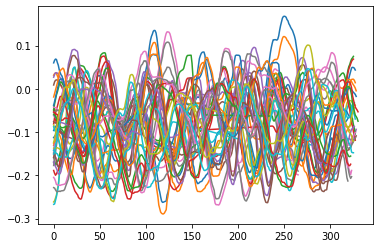

In [6]:
i = 0 
for data in dataset:

    c1 = np.array(data.center_1.to_list())      
    c2 = np.array(data.center_2.to_list())  
    # dv = c1 - c2
    # d = np.linalg.norm(c1-c2, axis=1)
    plt.plot(c1[:,i])
    plt.plot(c2[:,i])
    # D.append(np.round(np.mean(d)*100,1))
    # plt.plot(data.meas_vind_1.to_numpy())
    # plt.plot(data.meas_vind_2.to_numpy())   
    # plt.show() 

